# 뉴럴 네트워크 이진 분류 (당뇨병 데이터셋)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

## 1. 데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv

--2025-01-02 06:49:08--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2025-01-02 06:49:08 (95.4 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 데이터 전처리 필요

## 2. 데이터 분리

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## 3. 데이터 전처리

In [ ]:
# 결측치 확인
x_train.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 학습
ss.fit(x_train)
# 데이터 변경
x_train_s = ss.transform(x_train)
x_test_s = ss.transform(x_test)

In [ ]:
type(x_train_s), type(x_test_s)

(numpy.ndarray, numpy.ndarray)

In [ ]:
y_train_n = y_train.to_numpy()
type(y_train_n)

numpy.ndarray

In [ ]:
x_train_s.shape, y_train_n.shape

((614, 8), (614,))

## 4. 모델 만들기

In [ ]:
from keras import layers
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(units = 5, activation='relu'),
    keras.layers.Dense(units = 3, activation='relu'),
    keras.layers.Dense(units = 1, activation='sigmoid') # 출력층 1개 + 이진 분류 -> 시그모이드 사용 (0~1 확률 값)
    # 이진 분류는 출력층에서의 활성함수가 중요함
    # 다중 분류의 경우 마지막 출력층 -> softmax
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    ) # mse -> regression, 분류 -> accuracy

In [ ]:
EPOCHS = 150
BATCHSIZE = 32

history = model.fit(x_train_s, y_train_n, epochs=EPOCHS, batch_size=BATCHSIZE, validation_split=0.2)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4731 - loss: 0.9064 - val_accuracy: 0.4309 - val_loss: 0.8733
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4934 - loss: 0.8989 - val_accuracy: 0.4797 - val_loss: 0.8310
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 0.8365 - val_accuracy: 0.5122 - val_loss: 0.7950
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5402 - loss: 0.7963 - val_accuracy: 0.5285 - val_loss: 0.7689
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5487 - loss: 0.7660 - val_accuracy: 0.5691 - val_loss: 0.7490
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6010 - loss: 0.7537 - val_accuracy: 0.6098 - val_loss: 0.7315
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6215 - loss: 0.7184 - val_accuracy: 0.6260 - val_loss: 0.7186
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6123 - loss: 0.7100 - val_accuracy: 0.6341 - 

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

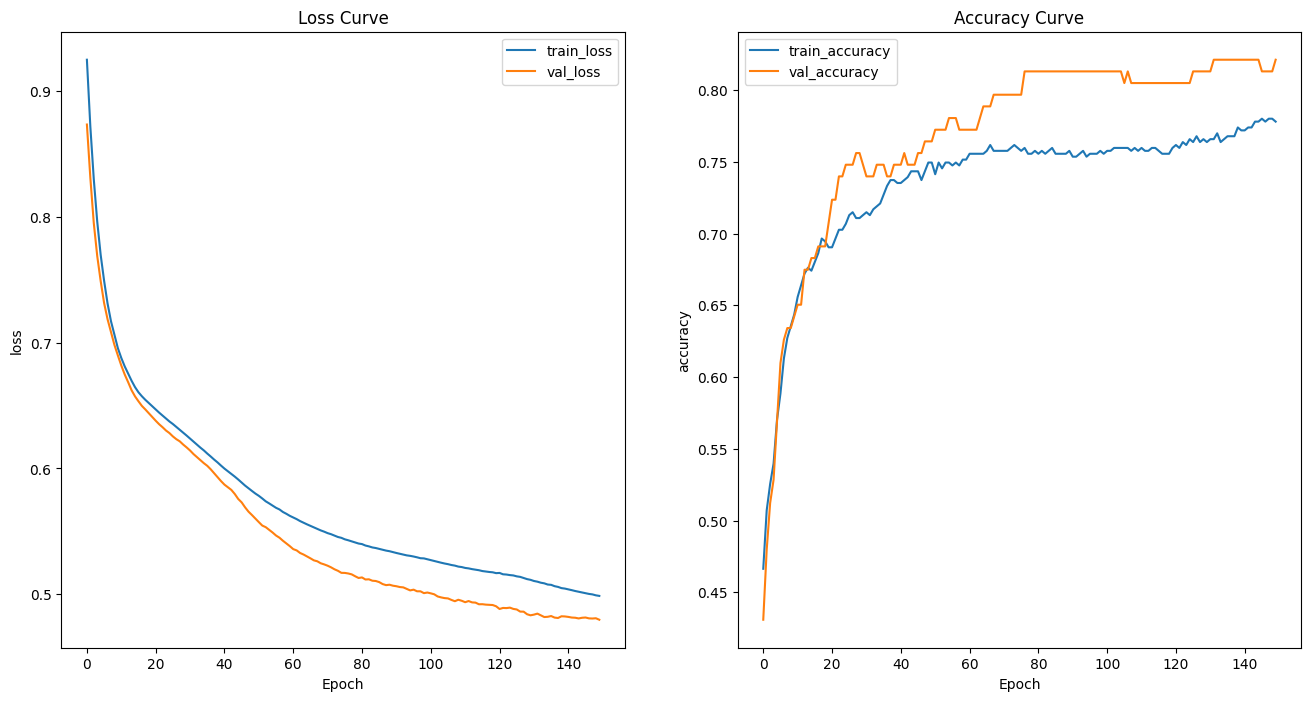

In [ ]:
plot_history(history)

## 5. 테스트

In [ ]:
y_test_n = y_test.to_numpy()
type(x_test_s), type(y_test_n)

(numpy.ndarray, numpy.ndarray)

In [ ]:
y_pred = model.predict(x_test_s)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
y_pred[:5] # 결과 -> 확률로 나옴 (sigmoid: 보통 0.5보다 크면 1, 작으면 0으로 판단함)

array([[0.7201898 ],
       [0.22826634],
       [0.22826634],
       [0.35635003],
       [0.22826634]], dtype=float32)

In [ ]:
y_test_n[:5]

array([0, 0, 0, 1, 0])

In [ ]:
y_pred = (y_pred.reshape(-1) > 0.5).astype('int')

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## 7. 평가지표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred): # 이진 분류 메트릭스
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred) # Assign the result to a variable (e.g., cm)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False) # Use the assigned variable
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 0.7143, prec: 0.6853, recall: 0.6565, f1: 0.6632


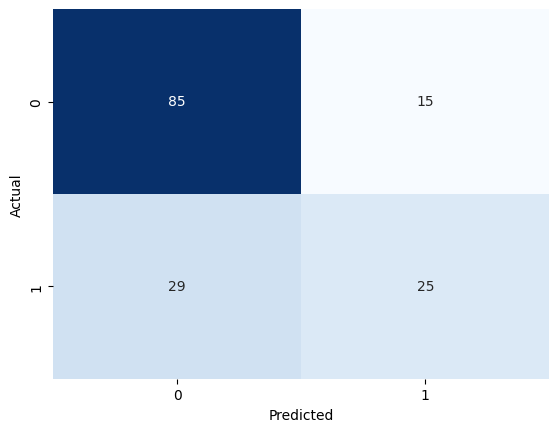

In [ ]:
print_metrics(y_test_n, y_pred)